In [2]:

# =============================================================================
# Assignment Proxima
# =============================================================================


# Load all needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import datasets
df_0 = pd.read_excel('https://drive.google.com/uc?export=download&id=1zcAObv2swOcR5vZD_DTVGgC78hqf2GnZ', sheet_name=0, header=0)

df_1 = pd.read_csv('https://drive.google.com/uc?export=download&id=1n_CVbn4GluIvXn86EutbXwQR-pNabS-a', header=0, sep=';', encoding='cp1251')

df_2 = pd.read_excel('https://drive.google.com/uc?export=download&id=19WgS_gBR5zvGkLnC5LvBvNwPcRFilp-j', sheet_name=0, header=0, skiprows=3, usecols=lambda x: 'Unnamed' not in x)

df_id = pd.read_excel('https://drive.google.com/uc?export=download&id=1RpO_9mxyxoA5ATK6ob5UdeCCkaSUalJR', sheet_name=0, header=0)

df_period = pd.read_excel('https://drive.google.com/uc?export=download&id=1adj2j5k6Q6_O02epS-CQvwSasCHjNf-t', sheet_name=0, header=0)


In [3]:
# Check data types, indexes, NaN values
df_0.info()
df_0.columns
df_0.head(10)

df_1.info()
df_1.columns
df_1.head(10)

df_2.info()
df_2.columns
df_2.head(10)

df_id.info()
df_id.columns
df_id.head(10)

df_period.info()
df_period.columns
df_period.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERIOD_ID  869 non-null    int64  
 1   DRUGS_ID   869 non-null    int64  
 2   VOLUME     869 non-null    float64
 3   QUANTITY   869 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DRUGS_ID   165 non-null    float64
 1   Тип        330 non-null    object 
 2   202101001  294 non-null    object 
 3   202101002  292 non-null    object 
 4   202101003  296 non-null    object 
 5   202101004  282 non-null    object 
 6   202101005  286 non-null    object 
 7   202101006  282 non-null    object 
dtypes: float64(1), object(7)
memory usage: 20.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

,PERIOD_ID,Date
0,201901001,2019-01-01
1,201901002,2019-02-01
2,201901003,2019-03-01
3,201901004,2019-04-01
4,201901005,2019-05-01
5,201901006,2019-06-01
6,201901007,2019-07-01
7,201901008,2019-08-01
8,201901009,2019-09-01
9,201901010,2019-10-01


In [4]:
# Convert df1 to a plain table
# Add empty PERIOD_ID
for i in range(len(df_1['DRUGS_ID'])):
    if str(df_1['DRUGS_ID'][i]) == 'nan':
        df_1.loc[i,'DRUGS_ID'] = df_1['DRUGS_ID'][i-1]
        
# Melt datetime columns to a rows
df_1_melt = df_1.melt(id_vars=['DRUGS_ID', 'Тип'], var_name='PERIOD_ID')
df_1_melt

# Convert data types
df_1_melt[['value']] = df_1_melt['value'].str.replace(",", ".").astype("float")
df_1_melt[['DRUGS_ID']] = df_1_melt[['DRUGS_ID']].astype("int64")
df_1_melt[['PERIOD_ID']] = df_1_melt[['PERIOD_ID']].astype("int64")


# Make pivot table from 'type' column 
df_1_pivot = pd.pivot_table(df_1_melt, 
                  index = ['PERIOD_ID', 'DRUGS_ID'], 
                  columns = 'Тип', 
                  values = 'value').reset_index().rename_axis(None, axis=1)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_1 = df_1_pivot[['PERIOD_ID', 'DRUGS_ID', 'VOLUME', 'QUANTITY']]


# change data type for column in df2
df_2['QUANTITY'] = df_2['QUANTITY'].apply(pd.to_numeric, errors='coerce').fillna(0)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERIOD_ID  866 non-null    int64  
 1   DRUGS_ID   866 non-null    int64  
 2   VOLUME     866 non-null    float64
 3   QUANTITY   866 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.2 KB


In [5]:
## Quick statistics
df_0.describe()
df_1.describe()
df_2.describe()
df_period.describe()
df_id.describe()


,DRUGS_ID,DRUG_FORM_NUMBER,BRAND_ID,Market Org ID
count,165.00,165.00,165.00,165.00
mean,347341.65,18.04,5869.87,360063.81
std,145029.50,20.95,11872.39,573075.95
min,202835.00,1.00,76.00,1.00
25%,245048.00,6.00,368.00,203.00
50%,273343.00,10.00,368.00,126825.00
75%,440268.00,24.00,2025.00,126825.00
max,770043.00,100.00,48363.00,1506526.00


In [6]:
## Join tables

# We can connect all datasets in SQL style
# Let's join ver_o, Drugs_id, PERIOD_ID
drugs_connect = pd.merge(df_0, df_id, on='DRUGS_ID', how="left")
all_connect = pd.merge(drugs_connect, df_period, on='PERIOD_ID', how="left")
all_connect.info()

drugs_sales = all_connect[['Date', 'Brand', 'Market Org', 'Full medication name', 'VOLUME', 'QUANTITY']]
drugs_sales.info()
drugs_sales


<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PERIOD_ID             869 non-null    int64         
 1   DRUGS_ID              869 non-null    int64         
 2   VOLUME                869 non-null    float64       
 3   QUANTITY              869 non-null    float64       
 4   Full medication name  869 non-null    object        
 5   DRUG_FORM_NUMBER      869 non-null    int64         
 6   BRAND_ID              869 non-null    int64         
 7   Brand                 869 non-null    object        
 8   Market Org ID         869 non-null    int64         
 9   Market Org            869 non-null    object        
 10  Category_Name         869 non-null    object        
 11  Rx/OTC                869 non-null    object        
 12  ATC Code (1)          869 non-null    object        
 13  Date                

,Date,Brand,Market Org,Full medication name,VOLUME,QUANTITY
0,2021-01-01,NUROFEN,Reckitt Benckiser Healthcare International (Gr...,"NUROFEN®, Reckitt Benckiser Healthcare Interna...",647375.74,4045.57
1,2021-01-01,PENTALGIN,Otcpharm (Russia),"PENTALGIN PLUS, Otcpharm (Russia), tabs cont. ...",96185.86,675.40
2,2021-01-01,PENTALGIN,Otcpharm (Russia),"PENTALGIN, Otcpharm (Russia), tabs coated w/fi...",104585890.91,721647.39
3,2021-01-01,PENTALGIN,Otcpharm (Russia),"PENTALGIN N, Otcpharm (Russia), tabs, #10",293805.18,1602.13
4,2021-01-01,PENTALGIN,Otcpharm (Russia),"PENTALGIN N, Otcpharm (Russia), tabs, #10",199988.29,1489.98
...,...,...,...,...,...,...
864,2021-06-01,PENTALGIN,Otcpharm (Russia),"PENTALGIN EXTRA-GEL, Otcpharm (Russia), gel f/...",9544539.22,17599.88
865,2021-06-01,INGAVIRIN,Valenta Pharmaceuticals (Russia),"INGAVIRIN, Valenta Pharmaceuticals (Russia), s...",10784167.54,17196.58
866,2021-06-01,XARELTO,Bayer (Germany),"XARELTO, Bayer (Germany), tabs coated w/film 1...",624626.04,542.53
867,2021-06-01,XARELTO,Bayer (Germany),"XARELTO, Bayer (Germany), tabs coated w/film 2...",4633635.04,872.64


In [7]:
## Group analysis

# count number of unique entries
drugs_sales.nunique()


## group with one variable


Date                      6
Brand                    10
Market Org               10
Full medication name    148
VOLUME                  869
QUANTITY                869
dtype: int64

In [8]:
# best selling Brands
drugs_brand = drugs_sales.groupby(['Brand'], as_index=False).sum().sort_values(['QUANTITY'], ascending=False)
drugs_brand


,Brand,VOLUME,QUANTITY
7,NUROFEN,3474120039.84,18145735.93
8,PENTALGIN,3238380726.29,15949825.20
1,ARBIDOL,4771891223.82,9307366.66
6,MEXIDOLUM,3429963002.48,7280310.66
5,INGAVIRIN,3365651761.83,4503916.27
0,ACTOVEGIN,2999633780.49,2939628.04
3,ELIQUIS,4659788294.32,2511573.64
2,DETRALEX,4071823700.44,2475858.73
4,HEPTRAL,3364070692.41,1851324.20
9,XARELTO,6532786469.51,1802528.26


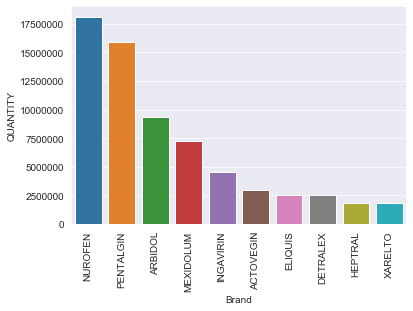

In [9]:
# Visualize brand sales using barplot
sns.set_style('darkgrid')
sns.barplot(x='Brand', y='QUANTITY', data=drugs_brand, ci = None)
plt.xticks(rotation = 'vertical')
plt.ticklabel_format(style='plain', axis='y')

In [10]:
# best selling Market Org
drugs_org = drugs_sales.groupby(['Market Org'], as_index=False).sum().sort_values(['QUANTITY'], ascending=False)
drugs_org

,Market Org,VOLUME,QUANTITY
3,Otcpharm (Russia),8010271950.12,25257191.86
6,Reckitt Benckiser Healthcare International (Gr...,3474120039.84,18145735.93
5,Pharmasoft (Russia),3182628871.86,6927995.56
9,Valenta Pharmaceuticals (Russia),3365651761.83,4503916.27
8,Takeda (Japan),2999633780.49,2939628.04
4,Pfizer Inc. (USA),4659788294.32,2511573.64
7,Servier (France),4071823700.44,2475858.73
0,Abbott Lab. USA (USA),3364070692.41,1851324.20
1,Bayer (Germany),6532786469.51,1802528.26
2,"Farmasoft (Russia, Moscow)",247334130.62,352315.10


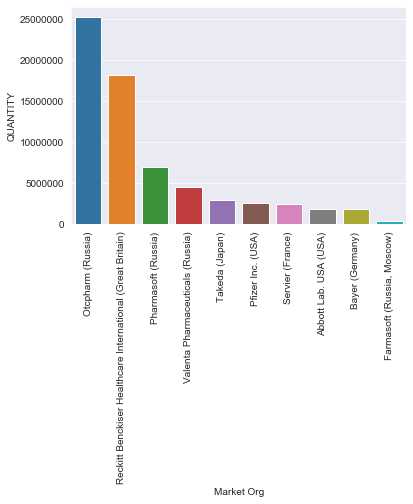

In [11]:
# Visualize sales by organization using barplot
sns.set_style('darkgrid')
sns.barplot(x='Market Org', y='QUANTITY', data=drugs_org, ci = None)
plt.xticks(rotation = 'vertical')
plt.ticklabel_format(style='plain', axis='y')

In [12]:
# sort sales by date
drugs_date = drugs_sales.groupby(['Date'], as_index=False).sum().sort_values(['QUANTITY'], ascending=False)
drugs_date
drugs_date[['Date']] = drugs_date['Date'].dt.date

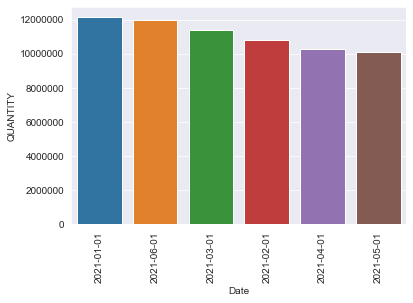

In [13]:
# Visualize sales by date using barplot
sns.set_style('darkgrid')
sns.barplot(x='Date', y='QUANTITY', data=drugs_date, ci = None)
plt.xticks(rotation = 'vertical')
plt.ticklabel_format(style='plain', axis='y')

In [14]:
# sort sales by name
drugs_name = drugs_sales.groupby(['Full medication name'], as_index=False).sum().sort_values(['QUANTITY'], ascending=False)
drugs_name

,Full medication name,VOLUME,QUANTITY
124,"PENTALGIN, Otcpharm (Russia), tabs coated w/fi...",2102194994.03,9510272.53
122,"PENTALGIN, Otcpharm (Russia), tabs coated w/fi...",656514927.64,4595700.69
48,"INGAVIRIN, Valenta Pharmaceuticals (Russia), c...",2924784640.90,3812748.89
15,"ARBIDOL MAXIMUM, Otcpharm (Russia), caps. 200 ...",2024014666.79,3683339.44
62,"MEXIDOLUM, Pharmasoft (Russia), tabs coated w/...",1203038643.18,2562878.56
...,...,...,...
2,"ACTOVEGIN, Takeda (Japan), ointment f/ext.appl...",632.05,1.99
11,"ACTOVEGIN, Takeda (Japan), sol. f/infus. 4 mg/...",3823.14,1.99
1,"ACTOVEGIN, Takeda (Japan), gel f/ext.applic. 2...",1180.45,1.92
83,"NUROFEN® 12+, Reckitt Benckiser Healthcare Int...",161.50,0.99


In [15]:
## group with multiple variables

# Grouping by Date and Brand, sort by QUANTITY
drugs_d_b = drugs_sales.groupby(['Date', 'Brand']).sum().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('QUANTITY', ascending=False))
drugs_d_b


VOLUME   QUANTITY
Date       Brand                             
2021-01-01 PENTALGIN  622108426.46 3057872.44
           NUROFEN    544444110.03 2768976.77
           ARBIDOL   1026571410.88 1974108.72
           MEXIDOLUM  575112978.69 1210039.68
           INGAVIRIN  904678152.05 1178333.17
           ELIQUIS    942978956.32  485446.96
           ACTOVEGIN  481877470.59  454728.56
           DETRALEX   596991479.03  377619.05
           HEPTRAL    575712531.21  317830.70
           XARELTO   1083332916.40  308822.59
2021-02-01 NUROFEN    565320164.94 2878265.45
           PENTALGIN  493914660.65 2438639.43
           ARBIDOL    868077351.37 1677389.84
           MEXIDOLUM  577614774.88 1217411.66
           INGAVIRIN  655542656.99  880134.17
           ACTOVEGIN  450116743.43  460725.40
           DETRALEX   571551931.27  348170.85
           HEPTRAL    586976905.67  323533.50
           ELIQUIS    603960762.08  319564.29
           XARELTO    976878082.06  277603.63
2021-03-01 NUROFEN    561577323.92 2880411.22
           PENTALGIN  549833546.16 2654868.16
           ARBIDOL    868082628.06 1724884.45
           MEXIDOLUM  641767594.09 1364042.04
           INGAVIRIN  586750013.66  797170.31
           ACTOVEGIN  546858655.89  577692.27
           DETRALEX   664617357.25  407363.26
           ELIQUIS    778195105.79  364244.62
           HEPTRAL    611960213.23  350090.61
           XARELTO   1032695487.86  279386.94
2021-04-01 NUROFEN    570590417.85 2993929.35
           PENTALGIN  479205007.99 2359530.20
           MEXIDOLUM  598262185.64 1277778.41
           ARBIDOL    597074072.40 1207322.99
           INGAVIRIN  399319731.55  552211.89
           ACTOVEGIN  545938994.31  536288.38
           DETRALEX   712915722.37  428747.55
           ELIQUIS    653479816.76  370511.65
           HEPTRAL    561560283.63  303548.10
           XARELTO   1028284158.30  275160.33
2021-05-01 NUROFEN    558222674.04 3013619.93
           PENTALGIN  553928788.96 2792038.65
           MEXIDOLUM  506448029.11 1071961.35
           ARBIDOL    478912936.92  943860.08
           INGAVIRIN  332954781.12  449345.02
           DETRALEX   726837438.22  444226.11
           ACTOVEGIN  471707719.79  443404.48
           ELIQUIS    734924449.85  400287.69
           XARELTO   1037461905.86  287936.24
           HEPTRAL    511435888.52  274329.20
2021-06-01 NUROFEN    673965349.07 3610533.20
           PENTALGIN  539390296.08 2646876.33
           ARBIDOL    933172824.19 1779800.57
           MEXIDOLUM  530757440.07 1139077.52
           INGAVIRIN  486406426.46  646721.71
           ELIQUIS    946249203.52  571518.42
           DETRALEX   798909772.30  469731.92
           ACTOVEGIN  503134196.47  466788.95
           XARELTO   1374133919.03  373618.54
           HEPTRAL    516424870.15  281992.10

In [16]:
# Grouping by Date and Brand, sort by VOLUME
drugs_sales.groupby(['Date', 'Brand']).sum().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('VOLUME', ascending=False))

VOLUME   QUANTITY
Date       Brand                             
2021-01-01 XARELTO   1083332916.40  308822.59
           ARBIDOL   1026571410.88 1974108.72
           ELIQUIS    942978956.32  485446.96
           INGAVIRIN  904678152.05 1178333.17
           PENTALGIN  622108426.46 3057872.44
           DETRALEX   596991479.03  377619.05
           HEPTRAL    575712531.21  317830.70
           MEXIDOLUM  575112978.69 1210039.68
           NUROFEN    544444110.03 2768976.77
           ACTOVEGIN  481877470.59  454728.56
2021-02-01 XARELTO    976878082.06  277603.63
           ARBIDOL    868077351.37 1677389.84
           INGAVIRIN  655542656.99  880134.17
           ELIQUIS    603960762.08  319564.29
           HEPTRAL    586976905.67  323533.50
           MEXIDOLUM  577614774.88 1217411.66
           DETRALEX   571551931.27  348170.85
           NUROFEN    565320164.94 2878265.45
           PENTALGIN  493914660.65 2438639.43
           ACTOVEGIN  450116743.43  460725.40
2021-03-01 XARELTO   1032695487.86  279386.94
           ARBIDOL    868082628.06 1724884.45
           ELIQUIS    778195105.79  364244.62
           DETRALEX   664617357.25  407363.26
           MEXIDOLUM  641767594.09 1364042.04
           HEPTRAL    611960213.23  350090.61
           INGAVIRIN  586750013.66  797170.31
           NUROFEN    561577323.92 2880411.22
           PENTALGIN  549833546.16 2654868.16
           ACTOVEGIN  546858655.89  577692.27
2021-04-01 XARELTO   1028284158.30  275160.33
           DETRALEX   712915722.37  428747.55
           ELIQUIS    653479816.76  370511.65
           MEXIDOLUM  598262185.64 1277778.41
           ARBIDOL    597074072.40 1207322.99
           NUROFEN    570590417.85 2993929.35
           HEPTRAL    561560283.63  303548.10
           ACTOVEGIN  545938994.31  536288.38
           PENTALGIN  479205007.99 2359530.20
           INGAVIRIN  399319731.55  552211.89
2021-05-01 XARELTO   1037461905.86  287936.24
           ELIQUIS    734924449.85  400287.69
           DETRALEX   726837438.22  444226.11
           NUROFEN    558222674.04 3013619.93
           PENTALGIN  553928788.96 2792038.65
           HEPTRAL    511435888.52  274329.20
           MEXIDOLUM  506448029.11 1071961.35
           ARBIDOL    478912936.92  943860.08
           ACTOVEGIN  471707719.79  443404.48
           INGAVIRIN  332954781.12  449345.02
2021-06-01 XARELTO   1374133919.03  373618.54
           ELIQUIS    946249203.52  571518.42
           ARBIDOL    933172824.19 1779800.57
           DETRALEX   798909772.30  469731.92
           NUROFEN    673965349.07 3610533.20
           PENTALGIN  539390296.08 2646876.33
           MEXIDOLUM  530757440.07 1139077.52
           HEPTRAL    516424870.15  281992.10
           ACTOVEGIN  503134196.47  466788.95
           INGAVIRIN  486406426.46  646721.71

(array([737730., 737791., 737850., 737911., 737972., 738034.]),
 <a list of 6 Text xticklabel objects>)

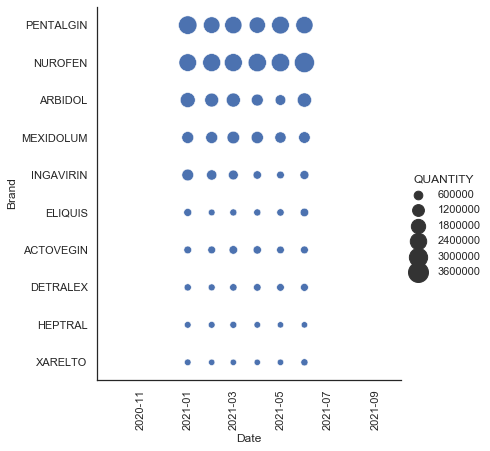

In [17]:
# Visualize grouped table using Scatterplot with varying point sizes
sns.set_theme(style="white")
sns.relplot(x="Date", y="Brand", size="QUANTITY",\
            sizes=(40, 400), palette="muted",\
            height=6, data=drugs_d_b)
plt.xticks(rotation = 'vertical')

(array([737730., 737791., 737850., 737911., 737972., 738034.]),
 <a list of 6 Text xticklabel objects>)

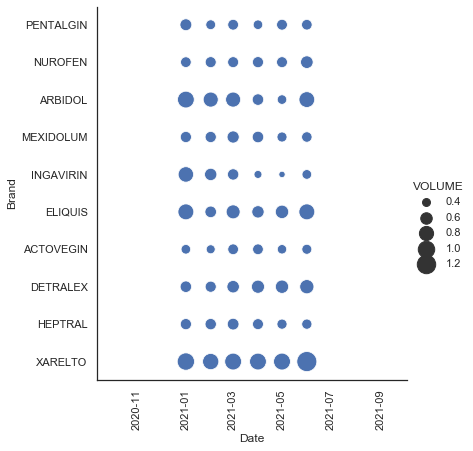

In [18]:
sns.set_theme(style="white")
sns.relplot(x="Date", y="Brand", size="VOLUME",\
            sizes=(40, 400), palette="muted",\
            height=6, data=drugs_d_b)
plt.xticks(rotation = 'vertical')

In [19]:
# Grouping with a pivot method
grouped = all_connect[['Date', 'Brand', 'QUANTITY']].groupby(['Date', 'Brand'],as_index=False).sum()
grouped_pivot = grouped.pivot(index='Date',columns='Brand')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot.index = grouped_pivot.index.strftime('%d-%m-%Y')
grouped_pivot


QUANTITY                                                      \
Brand      ACTOVEGIN    ARBIDOL  DETRALEX   ELIQUIS   HEPTRAL  INGAVIRIN   
Date                                                                       
01-01-2021 454728.56 1974108.72 377619.05 485446.96 317830.70 1178333.17   
01-02-2021 460725.40 1677389.84 348170.85 319564.29 323533.50  880134.17   
01-03-2021 577692.27 1724884.45 407363.26 364244.62 350090.61  797170.31   
01-04-2021 536288.38 1207322.99 428747.55 370511.65 303548.10  552211.89   
01-05-2021 443404.48  943860.08 444226.11 400287.69 274329.20  449345.02   
01-06-2021 466788.95 1779800.57 469731.92 571518.42 281992.10  646721.71   

                                                       
Brand       MEXIDOLUM    NUROFEN  PENTALGIN   XARELTO  
Date                                                   
01-01-2021 1210039.68 2768976.77 3057872.44 308822.59  
01-02-2021 1217411.66 2878265.45 2438639.43 277603.63  
01-03-2021 1364042.04 2880411.22 2654868.16 279386.94  
01-04-2021 1277778.41 2993929.35 2359530.20 275160.33  
01-05-2021 1071961.35 3013619.93 2792038.65 287936.24  
01-06-2021 1139077.52 3610533.20 2646876.33 373618.54

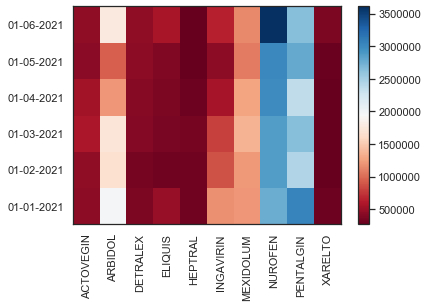

In [20]:
# Visualize pivot table using Heatmap 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

In [21]:
## growth rate

# find out growth rate in percents by period
drugs_date_grow = drugs_sales.groupby(['Date'], as_index=False).sum().sort_values(['Date'])
drugs_date_grow

drugs_date_grow['v_chg']=drugs_date_grow['VOLUME'].pct_change()
drugs_date_grow['q_chg']=drugs_date_grow['QUANTITY'].pct_change()
drugs_date_grow


,Date,VOLUME,QUANTITY,v_chg,q_chg
0,2021-01-01,7353808431.65,12133778.64,nan,nan
1,2021-02-01,6349954033.35,10821438.22,-0.14,-0.11
2,2021-03-01,6842337925.91,11400153.88,0.08,0.05
3,2021-04-01,6146630390.80,10305028.85,-0.10,-0.10
4,2021-05-01,5912834612.39,10121008.74,-0.04,-0.02
5,2021-06-01,7302544297.35,11986659.26,0.24,0.18


In [22]:
# find out growth rate in percents for brand by period

# prepare grouping
drugs_d_b_grow = drugs_sales.groupby(['Date', 'Brand'], as_index=False).sum().sort_values(['Brand', 'Date'])
drugs_d_b_grow['q_chg'] = drugs_d_b_grow.groupby(['Brand','Date'])['QUANTITY'].pct_change()
drugs_d_b_grow


,Date,Brand,VOLUME,QUANTITY,q_chg
0,2021-01-01,ACTOVEGIN,481877470.59,454728.56,nan
10,2021-02-01,ACTOVEGIN,450116743.43,460725.40,nan
20,2021-03-01,ACTOVEGIN,546858655.89,577692.27,nan
30,2021-04-01,ACTOVEGIN,545938994.31,536288.38,nan
40,2021-05-01,ACTOVEGIN,471707719.79,443404.48,nan
50,2021-06-01,ACTOVEGIN,503134196.47,466788.95,nan
1,2021-01-01,ARBIDOL,1026571410.88,1974108.72,nan
11,2021-02-01,ARBIDOL,868077351.37,1677389.84,nan
21,2021-03-01,ARBIDOL,868082628.06,1724884.45,nan
31,2021-04-01,ARBIDOL,597074072.40,1207322.99,nan


In [23]:
# calculate growth rate for brand by period in corresponding columns
drugs_d_b_grow['v_chg'] = drugs_d_b_grow.sort_values('Date').groupby('Brand').VOLUME.pct_change()

drugs_d_b_grow['q_chg'] = drugs_d_b_grow.sort_values('Date').groupby('Brand').QUANTITY.pct_change()

drugs_d_b_grow = drugs_d_b_grow.fillna(0)

drugs_d_b_grow


,Date,Brand,VOLUME,QUANTITY,q_chg,v_chg
0,2021-01-01,ACTOVEGIN,481877470.59,454728.56,0.00,0.00
10,2021-02-01,ACTOVEGIN,450116743.43,460725.40,0.01,-0.07
20,2021-03-01,ACTOVEGIN,546858655.89,577692.27,0.25,0.21
30,2021-04-01,ACTOVEGIN,545938994.31,536288.38,-0.07,-0.00
40,2021-05-01,ACTOVEGIN,471707719.79,443404.48,-0.17,-0.14
50,2021-06-01,ACTOVEGIN,503134196.47,466788.95,0.05,0.07
1,2021-01-01,ARBIDOL,1026571410.88,1974108.72,0.00,0.00
11,2021-02-01,ARBIDOL,868077351.37,1677389.84,-0.15,-0.15
21,2021-03-01,ARBIDOL,868082628.06,1724884.45,0.03,0.00
31,2021-04-01,ARBIDOL,597074072.40,1207322.99,-0.30,-0.31


In [24]:
# Visualize growth rate for brand by period

# datasets with growth rate
d_q = drugs_d_b_grow[['Date', 'Brand', 'q_chg']]
d_v = drugs_d_b_grow[['Date', 'Brand', 'v_chg']]

In [25]:
# prepare pivot tables for plotting
data_q = d_q.pivot(index='Date',columns='Brand', values='q_chg').rename_axis(None, axis=1).fillna(0)
data_v = d_v.pivot(index='Date',columns='Brand', values='v_chg').rename_axis(None, axis=1).fillna(0)

data_q
data_v


,ACTOVEGIN,ARBIDOL,DETRALEX,ELIQUIS,HEPTRAL,INGAVIRIN,MEXIDOLUM,NUROFEN,PENTALGIN,XARELTO
Date,,,,,,,,,,
2021-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2021-02-01,-0.07,-0.15,-0.04,-0.36,0.02,-0.28,0.00,0.04,-0.21,-0.10
2021-03-01,0.21,0.00,0.16,0.29,0.04,-0.10,0.11,-0.01,0.11,0.06
2021-04-01,-0.00,-0.31,0.07,-0.16,-0.08,-0.32,-0.07,0.02,-0.13,-0.00
2021-05-01,-0.14,-0.20,0.02,0.12,-0.09,-0.17,-0.15,-0.02,0.16,0.01
2021-06-01,0.07,0.95,0.10,0.29,0.01,0.46,0.05,0.21,-0.03,0.32


(array([737791., 737822., 737850., 737881., 737911., 737942.]),
 <a list of 6 Text xticklabel objects>)

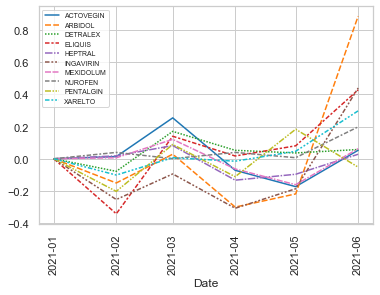

In [26]:
# Visualize growth rate(QUANTITY) in percents for brand by period using lineplot
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=data_q, palette="tab10")
plt.legend(fontsize='xx-small')
plt.xticks(rotation = 'vertical')

(array([737791., 737822., 737850., 737881., 737911., 737942.]),
 <a list of 6 Text xticklabel objects>)

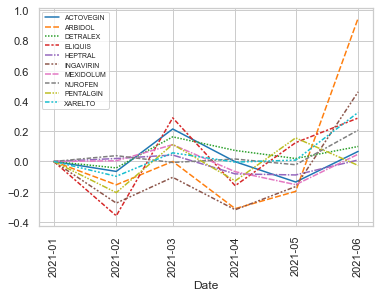

In [27]:
# Visualize growth rate(VOLUME) in percents for brand by period using lineplot
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=data_v, palette="tab10")
plt.legend(fontsize='xx-small')
plt.xticks(rotation = 'vertical')

In [28]:

# *

# rename columns
df_0 = df_0.rename(columns={'PERIOD_ID': '0_PERIOD_ID', 'DRUGS_ID': '0_DRUGS_ID', 'VOLUME': '0_VOLUME', 'QUANTITY': '0_QUANTITY'})

df_1 = df_1.rename(columns={'PERIOD_ID': '1_PERIOD_ID', 'DRUGS_ID': '1_DRUGS_ID', 'VOLUME': '1_VOLUME', 'QUANTITY': '1_QUANTITY'})

df_2 = df_2.rename(columns={'PERIOD_ID': '2_PERIOD_ID', 'DRUGS_ID': '2_DRUGS_ID', 'VOLUME': '2_VOLUME', 'QUANTITY': '2_QUANTITY'})

# join tables by version
drugs_connect_0 = pd.merge(df_0, df_id, left_on='0_DRUGS_ID', right_on='DRUGS_ID', how="left")

all_connect_0 = pd.merge(drugs_connect_0, df_period, left_on='0_PERIOD_ID', right_on='PERIOD_ID', how="left")
all_connect_0.info()


drugs_connect_1 = pd.merge(df_1, df_id, left_on='1_DRUGS_ID', right_on='DRUGS_ID', how="left")

all_connect_1 = pd.merge(drugs_connect_1, df_period, left_on='1_PERIOD_ID', right_on='PERIOD_ID', how="left")
all_connect_1.info()


drugs_connect_2 = pd.merge(df_2, df_id, left_on='2_DRUGS_ID', right_on='DRUGS_ID', how="left")

all_connect_2 = pd.merge(drugs_connect_2, df_period, left_on='2_PERIOD_ID', right_on='PERIOD_ID', how="left")
all_connect_2.info()



# Group all sets by Full medication name
drugs_sales_0 = all_connect_0[['Date', 'Brand', 'Market Org', 'Full medication name', '0_VOLUME', '0_QUANTITY']]

drugs_name_0 = drugs_sales_0.groupby(['Full medication name'], as_index=False).sum().sort_values(['0_QUANTITY'], ascending=False)


drugs_sales_1 = all_connect_1[['Date', 'Brand', 'Market Org', 'Full medication name', '1_VOLUME', '1_QUANTITY']]

drugs_name_1 = drugs_sales_1.groupby(['Full medication name'], as_index=False).sum().sort_values(['1_QUANTITY'], ascending=False)


drugs_sales_2 = all_connect_2[['Date', 'Brand', 'Market Org', 'Full medication name', '2_VOLUME', '2_QUANTITY']]

drugs_name_2 = drugs_sales_2.groupby(['Full medication name'], as_index=False).sum().sort_values(['2_QUANTITY'], ascending=False)



# join grouped tables in one
drugs_name_m1 = pd.merge(drugs_name_0, drugs_name_1, on='Full medication name', how='left')

drugs_name_m2 = pd.merge(drugs_name_m1, drugs_name_2, on='Full medication name', how="left")


# 
drugs_name_m2['0-1'] = abs(drugs_name_m2['0_QUANTITY'] - drugs_name_m2['1_QUANTITY'])

drugs_name_m2['0-2'] = abs(drugs_name_m2['0_QUANTITY'] - drugs_name_m2['2_QUANTITY'])


drugs_name_m2[['0-1', '0-2']]
drugs_name_m2[['0-1']].sum()
drugs_name_m2[['0-2']].sum()

# df_2 is less different from production dataset df_0



<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   0_PERIOD_ID           869 non-null    int64         
 1   0_DRUGS_ID            869 non-null    int64         
 2   0_VOLUME              869 non-null    float64       
 3   0_QUANTITY            869 non-null    float64       
 4   DRUGS_ID              869 non-null    int64         
 5   Full medication name  869 non-null    object        
 6   DRUG_FORM_NUMBER      869 non-null    int64         
 7   BRAND_ID              869 non-null    int64         
 8   Brand                 869 non-null    object        
 9   Market Org ID         869 non-null    int64         
 10  Market Org            869 non-null    object        
 11  Category_Name         869 non-null    object        
 12  Rx/OTC                869 non-null    object        
 13  ATC Code (1)        

0-2   509683.03
dtype: float64